In [1]:
import sqlite3
import mysql.connector
import pandas as pd
import getpass
import sqlalchemy as sq
import psycopg2
import numpy as np
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import datetime
from collections import Counter
import plotly.plotly as py
from plotly.graph_objs import *
import plotly 
import plotly.figure_factory as ff
plotly.tools.set_credentials_file(username='mainakchain', api_key='D4yyG8ie5OOYcGe3iN1y')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.



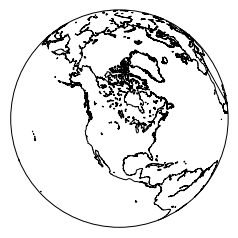

In [2]:
# from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
map.drawcoastlines()

In [3]:
ddf = pd.read_csv('ddf.csv')

In [4]:
duration_based = pd.read_csv('duration_histories.csv')

In [5]:
cdf = pd.read_csv('consigner_trips.csv')

In [6]:
ddf = pd.read_csv('new_ddf.csv')

In [6]:
ddf.head()

,vehicle_no,distance_travelled,avg_speed,start_timestamp,end_timestamp,start_landmark,end_landmark,old_state,new_state,duration,...,start_lat,start_long,old_distance_km,start_time,end_time,start,end,total_duration,origin,destination
0,AP02TA9077,0.09,7.41,2017-11-29 05:24:08,2017-11-29 05:31:08,Rd Number 6 Bajrangi Bagan Lakshimi Nagar B...,"Jamshedpur, Jharkhand, India, 831007",stopped,moving,0 days 18:35:46.000000000,...,22.772160,86.216637,7009.43,2017-11-29,2017-11-29,2017-11-29 05:24:08,2017-11-29 23:59:54,18.596111,Jamshedpur,Kondapalli
1,AP02TA9077,0.06,0.00,2017-11-29 05:31:08,2017-11-29 05:32:08,"Jamshedpur, Jharkhand, India, 831007","Jamshedpur, Jharkhand, India, 831007",moving,stopped,0 days 18:35:46.000000000,...,22.772087,86.217445,7009.52,2017-11-29,2017-11-29,2017-11-29 05:24:08,2017-11-29 23:59:54,18.596111,Jamshedpur,Kondapalli
2,AP02TA9077,0.08,9.26,2017-11-29 05:32:08,2017-11-29 05:33:08,"Jamshedpur, Jharkhand, India, 831007","Jamshedpur, Jharkhand, India, 831007",stopped,moving,0 days 18:35:46.000000000,...,22.772421,86.217369,7009.58,2017-11-29,2017-11-29,2017-11-29 05:24:08,2017-11-29 23:59:54,18.596111,Jamshedpur,Kondapalli
3,AP02TA9077,0.13,1.85,2017-11-29 05:33:08,2017-11-29 05:34:08,"Jamshedpur, Jharkhand, India, 831007","Jamshedpur, Jharkhand, India, 831007",moving,stopped,0 days 18:35:46.000000000,...,22.773092,86.217331,7009.66,2017-11-29,2017-11-29,2017-11-29 05:24:08,2017-11-29 23:59:54,18.596111,Jamshedpur,Kondapalli
4,AP02TA9077,0.24,5.56,2017-11-29 05:34:08,2017-11-29 06:18:19,"Jamshedpur, Jharkhand, India, 831007","Jamshedpur, Jharkhand, India, 831007",stopped,moving,0 days 18:35:46.000000000,...,22.772881,86.217110,7009.79,2017-11-29,2017-11-29,2017-11-29 05:24:08,2017-11-29 23:59:54,18.596111,Jamshedpur,Kondapalli


In [7]:
ddf.origin = ddf.origin.astype(str)
ddf.destination = ddf.destination.astype(str)

In [8]:
ddf['origin'] = ddf['origin'].apply(lambda x: x.upper())
ddf['destination'] = ddf['destination'].apply(lambda x: x.upper())

In [9]:
ddf['start_timestamp'] = ddf['start_timestamp'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
ddf['end_timestamp'] = ddf['end_timestamp'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [10]:
ddf.destination.value_counts()

FARIDABAD RLY SDG                 8472
VISAKHAPATNAM                     6585
PUNE                              4259
HOSUR                             3998
AHMEDABAD                         3807
SPL. RLY SIDNG FARIDABAD          2867
AURANGABAD                        2799
BHIWADI                           2594
PALWAL                            1822
KOLKATA                           1687
ASAUDAH                           1570
JAIPUR                            1569
INDORE                            1569
SRIPERUMBUDUR                     1443
VIJAYAWADA                        1430
NAGPUR                            1322
BANGALORE                         1209
FARIDABAD                         1205
BHIWANDI                          1201
SECUNDERABAD                      1168
GANNAVARAM                        1020
KANPUR                             936
CHENNAI                            912
NEW DELHI                          847
JAJPUR                             826
GURGAON                  

In [121]:
ddf[(ddf['origin'] == 'JAMSHEDPUR') & (ddf['destination'] == 'HOSUR')].shape

(3998, 29)

In [122]:
test_df = ddf[(ddf['origin'] == 'JAMSHEDPUR') & (ddf['destination'] == 'HOSUR')]

In [123]:
test_df['duration'] = test_df['end_timestamp'] - test_df['start_timestamp']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [124]:
test_df.duration = test_df.duration.apply(lambda x: x.total_seconds()/60)

In [125]:
test_df.new_state.value_counts()

stopped    2026
moving     1971
idle          1
Name: new_state, dtype: int64

In [126]:
test_df['stopped'] = 0
test_df['idle'] = 0
test_df['moving'] = 0

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

In [127]:
for truck in test_df.vehicle_no.unique().tolist():
    test_df.loc[(test_df['vehicle_no'] == truck) & (test_df['old_state'] == 'stopped'), 'stopped'] = test_df.loc[(test_df['vehicle_no'] == truck) & (test_df['old_state'] == 'stopped')]['duration']
    test_df.loc[(test_df['vehicle_no'] == truck) & (test_df['old_state'] == 'moving'), 'moving'] = test_df.loc[(test_df['vehicle_no'] == truck) & (test_df['old_state'] == 'moving')]['duration']
    test_df.loc[(test_df['vehicle_no'] == truck) & (test_df['old_state'] == 'idle'), 'idle'] = test_df.loc[(test_df['vehicle_no'] == truck) & (test_df['old_state'] == 'idle')]['duration']

In [128]:
test_df[['stopped','moving','idle']] = test_df[['stopped','moving','idle']].fillna(0)


In [129]:
test_df.columns

Index([u'vehicle_no', u'distance_travelled', u'avg_speed', u'start_timestamp',
       u'end_timestamp', u'start_landmark', u'end_landmark', u'old_state',
       u'new_state', u'duration', u'distance_km', u'createdAt', u'updatedAt',
       u'end_lat', u'end_long', u'start_lat', u'start_long',
       u'old_distance_km', u'start_time', u'end_time', u'start', u'end',
       u'total_duration', u'origin', u'destination', u'stopped', u'moving',
       u'idle', u'route'],
      dtype='object')

In [130]:
test_df.duration.max()

1439.6833333333334

In [131]:
plot_df = test_df[test_df['stopped'] != 0]

In [132]:
fig = ff.create_violin(plot_df['stopped'].tolist(), colors='#3498DB')
py.iplot(fig, filename='One Violin')

In [133]:
plot_df = test_df[test_df['stopped'] >=150]
hour_list = plot_df.duration.tolist()

data = Data([
    Scattermapbox(
        lat= plot_df['start_lat'].tolist(),
        lon=plot_df['start_long'].tolist(),
        mode='markers',
        marker=Marker(
            size=9
        ),
        text=zip(plot_df.start_landmark.tolist(), [ '%.2f' % elem for elem in hour_list ]),
    )],
    
    transforms = [
#       dict(
#         type = 'filter',
#         target = df['year'],
#         orientation = '=',
#         value = 2007
#       ),
      dict(
        type = 'groupby',
        groups = plot_df['duration'],
        color='rgb(40,40,40)',
    )]
)
layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
#         accesstoken='D4yyG8ie5OOYcGe3iN1y',
        bearing=0,
        center=dict(
            lat=21.146633, 
            lon=79.08
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Stops of more than 5 hours')

In [134]:
# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/alpha_shape.csv')
# df.head()
plot_df = test_df[test_df['stopped'] > 120]

scatter = dict(
    mode = "markers",
    name = "y",
    type = "scatter3d",    
    x = plot_df['start_lat'], y = plot_df['start_long'], z = plot_df['duration'],
    marker = dict( size=5, color="rgb(169, 15, 64)" )
)
clusters = dict(
    alphahull = 8,
    name = "y",
    opacity = 0.5,
    type = "mesh3d",    
    x = plot_df['start_lat'], y = plot_df['start_long'], z = plot_df['duration']
)
layout = dict(
    title = '3d point clustering',
    scene = dict(
        xaxis = dict( zeroline=False ),
        yaxis = dict( zeroline=False ),
        zaxis = dict( zeroline=False ),
    )
)
fig = dict( data=[scatter, clusters], layout=layout )
# Use py.iplot() for IPython notebook
py.iplot(fig, filename='3d point clustering')

In [135]:
ddf.columns

Index([u'vehicle_no', u'distance_travelled', u'avg_speed', u'start_timestamp',
       u'end_timestamp', u'start_landmark', u'end_landmark', u'old_state',
       u'new_state', u'duration', u'distance_km', u'createdAt', u'updatedAt',
       u'end_lat', u'end_long', u'start_lat', u'start_long',
       u'old_distance_km', u'start_time', u'end_time', u'start', u'end',
       u'total_duration', u'origin', u'destination', u'stopped', u'moving',
       u'idle', u'route'],
      dtype='object')

In [136]:
ddf.head()

,vehicle_no,distance_travelled,avg_speed,start_timestamp,end_timestamp,start_landmark,end_landmark,old_state,new_state,duration,...,end_time,start,end,total_duration,origin,destination,stopped,moving,idle,route
0,AP02TA9077,0.09,7.41,2017-11-29 05:24:08,2017-11-29 05:31:08,Rd Number 6 Bajrangi Bagan Lakshimi Nagar B...,"Jamshedpur, Jharkhand, India, 831007",stopped,moving,7.000000,...,2017-11-29,2017-11-29 05:24:08,2017-11-29 23:59:54,18.596111,JAMSHEDPUR,KONDAPALLI,7.000000,0.0,0.0,JAMSHEDPUR - KONDAPALLI
1,AP02TA9077,0.06,0.00,2017-11-29 05:31:08,2017-11-29 05:32:08,"Jamshedpur, Jharkhand, India, 831007","Jamshedpur, Jharkhand, India, 831007",moving,stopped,1.000000,...,2017-11-29,2017-11-29 05:24:08,2017-11-29 23:59:54,18.596111,JAMSHEDPUR,KONDAPALLI,0.000000,1.0,0.0,JAMSHEDPUR - KONDAPALLI
2,AP02TA9077,0.08,9.26,2017-11-29 05:32:08,2017-11-29 05:33:08,"Jamshedpur, Jharkhand, India, 831007","Jamshedpur, Jharkhand, India, 831007",stopped,moving,1.000000,...,2017-11-29,2017-11-29 05:24:08,2017-11-29 23:59:54,18.596111,JAMSHEDPUR,KONDAPALLI,1.000000,0.0,0.0,JAMSHEDPUR - KONDAPALLI
3,AP02TA9077,0.13,1.85,2017-11-29 05:33:08,2017-11-29 05:34:08,"Jamshedpur, Jharkhand, India, 831007","Jamshedpur, Jharkhand, India, 831007",moving,stopped,1.000000,...,2017-11-29,2017-11-29 05:24:08,2017-11-29 23:59:54,18.596111,JAMSHEDPUR,KONDAPALLI,0.000000,1.0,0.0,JAMSHEDPUR - KONDAPALLI
4,AP02TA9077,0.24,5.56,2017-11-29 05:34:08,2017-11-29 06:18:19,"Jamshedpur, Jharkhand, India, 831007","Jamshedpur, Jharkhand, India, 831007",stopped,moving,44.183333,...,2017-11-29,2017-11-29 05:24:08,2017-11-29 23:59:54,18.596111,JAMSHEDPUR,KONDAPALLI,44.183333,0.0,0.0,JAMSHEDPUR - KONDAPALLI


In [44]:
dur_travel = test_df[test_df['moving'] != 0]

In [47]:
dur_travel['moving'].describe()

count    1985.000000
mean       24.243149
std        30.287079
min         0.183333
25%         2.000000
50%        13.000000
75%        37.000000
max       418.033333
Name: moving, dtype: float64

In [59]:
test_df.groupby('vehicle_no').stopped.sum().tolist()

47

In [54]:
test_df.vehicle_no.unique().tolist()

['AP04TX2171',
 'AP07TB1989',
 'AP07TU1409',
 'AP07TU2566',
 'BR01GD7712',
 'CG04DM2391',
 'CG04FB5095',
 'CG08L3445',
 'JH01AE6027',
 'JH02M1289',
 'JH05AD8418',
 'JH05AE4540',
 'JH05AW6380',
 'JH05BQ1509',
 'JH05Y2275',
 'OD04C1925',
 'OD04D5891',
 'OD04F1729',
 'OD04F2036',
 'OD04G4791',
 'OD04H5921',
 'OD04J1422',
 'OD07M1151',
 'OR01S7415',
 'OR04M5329',
 'OR04M6922',
 'OR05AD5529',
 'OR05AJ1525',
 'OR05AJ1911',
 'OR05AJ8915',
 'OR07AA0311',
 'OR07J9793',
 'OR07U6675',
 'OR07V0091',
 'OR07V2855',
 'OR07V5231',
 'OR07W2988',
 'OR07Y9451',
 'OR09G6882',
 'OR11D4683',
 'OR11J1747',
 'OR14Q7721',
 'TN30U6751',
 'TN30Y9767',
 'TN90C2988',
 'UP67C4257',
 'WB23B7298']

In [137]:
trace1 = go.Bar(
    x=test_df.vehicle_no.unique().tolist(),
    y=test_df.groupby('vehicle_no').stopped.sum().tolist(),
    name='stopped',
    marker=dict(
        color='rgb(55, 83, 109)'
    )
)
trace2 = go.Bar(
    x=test_df.vehicle_no.unique().tolist(),
    y=test_df.groupby('vehicle_no').moving.sum().tolist(),
    name='moving',
    marker=dict(
        color='rgb(26, 118, 255)'
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title='Stopped-Moving analysis',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='minutes',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Stopped-Moving Analysis')

In [138]:
ddf['duration'] = ddf['end_timestamp'] - ddf['start_timestamp']

In [139]:
ddf['duration'] = ddf['duration'].apply(lambda x: x.total_seconds()/60)

In [141]:

# ddf['stopped'] = 0
# ddf['moving'] = 0
# ddf['idle'] = 0

# for truck in ddf.vehicle_no.unique().tolist():
#     ddf.loc[(ddf['vehicle_no'] == truck) & (ddf['old_state'] == 'stopped'), 'stopped'] = ddf.loc[(ddf['vehicle_no'] == truck) & (ddf['old_state'] == 'stopped')]['duration']
#     ddf.loc[(ddf['vehicle_no'] == truck) & (ddf['old_state'] == 'moving'), 'moving'] = ddf.loc[(ddf['vehicle_no'] == truck) & (ddf['old_state'] == 'moving')]['duration']
#     ddf.loc[(ddf['vehicle_no'] == truck) & (ddf['old_state'] == 'idle'), 'idle'] = ddf.loc[(ddf['vehicle_no'] == truck) & (ddf['old_state'] == 'idle')]['duration']

In [142]:
ddf.new_state.value_counts()

moving     32298
stopped    30587
idle       12439
sim           99
Name: new_state, dtype: int64

In [143]:
trace1 = go.Bar(
    x=ddf.vehicle_no.unique().tolist(),
    y=ddf.groupby('vehicle_no').stopped.sum().tolist(),
    name='stopped',
    marker=dict(
        color='rgb(55, 83, 109)'
    )
)
trace2 = go.Bar(
    x=ddf.vehicle_no.unique().tolist(),
    y=ddf.groupby('vehicle_no').moving.sum().tolist(),
    name='moving',
    marker=dict(
        color='rgb(26, 118, 255)'
    )
)

trace3 = go.Bar(
    x=ddf.vehicle_no.unique().tolist(),
    y=ddf.groupby('vehicle_no').idle.sum().tolist(),
    name='idle',
    marker=dict(
        color='rgb(156, 219, 52  )'
    )
)
data = [trace1, trace2, trace3]
layout = go.Layout(
    title='Stopped-Moving analysis for all routes',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='minutes',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Stopped-Moving Analysis for all routes')

In [77]:
ddf.vehicle_no.nunique()

1487

In [144]:
trace0 = go.Scatter(
    x=ddf.vehicle_no.unique().tolist(),
    y=ddf.groupby('vehicle_no').stopped.sum().tolist(),
    name='stopped',
    mode = 'lines',
)
trace1 = go.Scatter(
    x=ddf.vehicle_no.unique().tolist(),
    y=ddf.groupby('vehicle_no').moving.sum().tolist(),
    name='moving',
    mode = 'lines+markers',
)
trace2 = go.Scatter(
    x=ddf.vehicle_no.unique().tolist(),
    y=ddf.groupby('vehicle_no').idle.sum().tolist(),
    name='idle',
    mode = 'markers',
)


layout = go.Layout(
    autosize=False,
    width=5000,
    height=5000,
#     margin=go.Margin(
#         l=50,
#         r=50,
#         b=100,
#         t=100,
#         pad=4
#     ),
#     paper_bgcolor='#7f7f7f',
#     plot_bgcolor='#c7c7c7'
)

layout = go.Layout(
    
)
data = [trace0, trace1, trace2]



py.iplot(data, filename='line-mode')

In [145]:
# ddf['route'] = ddf['origin'] + ' - ' + ddf['destination']

In [146]:
# cdf.isnull().sum()

In [98]:
# cdf.shape

(21165, 48)

In [99]:
# cdf = cdf[pd.notnull(cdf['loading_out_time'])]

In [100]:
# cdf.shape

(6430, 48)

In [102]:
# cdf = cdf[pd.notnull(cdf['unloading_in_time'])]

In [103]:
# cdf.shape

(5572, 48)

In [106]:
# set(cdf.vehicle_no.unique().tolist() ) <= set(ddf.vehicle_no.unique().tolist() )

False

In [107]:
# ddf_copy = ddf.copy()

In [108]:
# ddf = ddf[ddf['vehicle_no'].isin(cdf.vehicle_no.unique().tolist())]

In [109]:
# ddf.shape, ddf_copy.shape

((75423, 29), (101043, 29))

In [4]:
# ddf.to_csv('new_ddf.csv', index=False)
ddf = pd.read_csv('new_ddf.csv')

In [5]:
ddf['route'] = ddf['route'].apply(lambda x: x.lower())

In [6]:
ddf[ddf['route'] == 'bamnipal - bhiwandi'].stopped.sum()

15247.400000001766

In [158]:
route_list = ddf.route.unique().tolist()

In [160]:
# X_list = []
# for route in route_list:
#     y_stopped = ddf[ddf['route'] == route]['stopped'].sum()
#     y_moving = ddf[ddf['route'] == route]['moving'].sum()
#     y_idle = ddf[ddf['route'] == route]['idle'].sun()

In [179]:
route_lis = ddf.route.unique().tolist()

In [183]:
route_lis = sorted(route_lis)

In [185]:
len(route_lis)

182

In [189]:
ddf.groupby('route').stopped.sum()/60

route
athagarh - alwar                           56.898333
athagarh - bhiwandi                         3.798056
athagarh - faridabad                        4.204722
athagarh - visakhapatnam                  154.577500
bamaloi - faridabad                        91.326667
bamaloi - visakhapatnam                   537.288056
bamnipal - ahmedabad                        5.821389
bamnipal - alwar                            1.116944
bamnipal - bhiwandi                       254.123333
bamnipal - faridabad                       71.882222
bamnipal - jajpur                         300.043333
bamnipal - jamshedpur                      35.335556
bamnipal - paradip                        150.918889
bamnipal - visakhapatnam                  460.591667
dhenkanal - ahmedabad                      52.630833
dhenkanal - faridabad                      15.481944
dhenkanal - visakhapatnam                 663.531389
duburi - chennai                            0.000000
duburi, jajpur - ahmedabad              

In [194]:
lis_stopped = ddf.groupby('route').stopped.sum().tolist()
lis_moving = ddf.groupby('route').moving.sum().tolist()
lis_idle = ddf.groupby('route').idle.sum().tolist()

trace0 = go.Scatter(
    x=route_lis,
    y=[x/60 for x in lis_stopped],   #in hours
    name='stopped',
    mode = 'lines',
)
trace1 = go.Scatter(
    x=route_lis,
    y=[x/60 for x in lis_moving],    #in hours 
    name='moving',
    mode = 'lines',
)
trace2 = go.Scatter(
    x=route_lis,
    y=[x/60 for x in lis_idle],   #in hours
    name='idle',
    mode = 'lines',
)


layout = go.Layout(
    autosize=False,
    width=3000,
    height=6000,
#     margin=go.Margin(
#         l=50,
#         r=50,
#         b=100,
#         t=100,
#         pad=4
#     ),
#     paper_bgcolor='#7f7f7f',
#     plot_bgcolor='#c7c7c7'
)

layout = go.Layout(
    
)
data = [trace0, trace1, trace2]



py.iplot(data, filename='line-mode')

In [202]:
ROUTE = 'jamshedpur - ahmedabad'; # in format: 'origin - destination'   everything in lowercase

route_df = ddf[ddf['route'] == ROUTE]   

In [208]:
trace1 = go.Bar(
    x=route_df.vehicle_no.unique().tolist(),
    y=route_df.groupby('vehicle_no').stopped.sum().tolist(),
    name='stopped',
    marker=dict(
        color='rgb(248, 115, 18 )'
    )
)
trace2 = go.Bar(
    x=route_df.vehicle_no.unique().tolist(),
    y=route_df.groupby('vehicle_no').moving.sum().tolist(),
    name='moving',
    marker=dict(
        color='rgb(157, 248, 18)'
    )
)

trace3 = go.Bar(
    x=route_df.vehicle_no.unique().tolist(),
    y=route_df.groupby('vehicle_no').idle.sum().tolist(),
    name='idle',
    marker=dict(
        color='rgb(255, 183, 19)'
    )
)


data = [trace1, trace2, trace3]
layout = go.Layout(
    title='Stopped-Moving-Idle analysis',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='minutes',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Stopped-Moving-Idle Analysis')

In [8]:
route_median_mean_std = ddf.groupby('route')[['stopped','moving','idle']].agg(['median','mean','std'])

In [11]:
ddf.groupby('route')[['stopped','moving','idle']].agg(['median','mean','std'])

stopped                           \
                                             median         mean         std   
route                                                                          
athagarh - alwar                           0.983333   106.684375  253.388819   
athagarh - bhiwandi                        0.000000     2.921581   10.892111   
athagarh - faridabad                       1.200000    14.840196   44.619520   
athagarh - visakhapatnam                   0.975000    36.229102  102.748152   
bamaloi - faridabad                        1.000000    35.581818   98.256994   
bamaloi - visakhapatnam                    0.000000    17.539327   62.933176   
bamnipal - ahmedabad                       2.008333    19.404630   34.596358   
bamnipal - alwar                           0.500000    11.169444   24.496917   
bamnipal - bhiwandi                        0.500000    15.606346   72.261332   
bamnipal - faridabad                       0.483333    22.004762   79.246121   
bamnipal - jajpur                          0.000000    21.794915   59.045897   
bamnipal - jamshedpur                      1.000000    41.571242  116.061464   
bamnipal - paradip                        18.983333   137.198990  215.767006   
bamnipal - visakhapatnam                   0.000000    26.700966  124.681840   
dhenkanal - ahmedabad                      0.000000    18.575588   78.933210   
dhenkanal - faridabad                      1.000000    27.321078   96.752382   
dhenkanal - visakhapatnam                  0.000000    23.446339   81.074418   
duburi - chennai                           0.000000     0.000000    0.000000   
duburi, jajpur - ahmedabad                 0.000000     0.000000    0.000000   
duburi, jajpur - bahadurgarh               0.000000     0.000000    0.000000   
duburi, jajpur - changodar                 0.000000     0.000000    0.000000   
duburi, jajpur - chennai                   0.000000     0.000000    0.000000   
duburi, jajpur - faridabad                 0.000000     0.000000    0.000000   
duburi, jajpur - ghaziabad                 0.000000     0.000000    0.000000   
duburi, jajpur - hyderabad                 0.000000     0.000000    0.000000   
duburi, jajpur - hyderabad-dist. medak     0.000000     1.726961   13.880355   
duburi, jajpur - ludhiana                  0.000000     0.000000    0.000000   
duburi, jajpur - thiruninravur             0.000000     0.000000    0.000000   
duburi, jajpur - vishakapatnam             0.000000     0.000000    0.000000   
duburi, jajpur - vishakhapatnam            0.000000     0.000000    0.000000   
...                                             ...          ...         ...   
jamshedpur - veerappanur                  92.983333    92.983333         NaN   
jamshedpur - vijayawada                    1.000000    36.821573  136.131833   
jamshedpur - visakhapatnam                 0.000000    25.111481  104.739395   
jamshedpur - vishakhapatnam                0.000000    16.133537   50.536303   
jharkhand - jaipur                         0.000000     0.000000    0.000000   
jharkhand - new delhi                      0.000000    16.972637   82.176841   
joda - nagpur                              0.183333    16.841358   61.215461   
palwal - htpl- fariadabad                  0.000000    27.645652  127.251152   
palwal - khuskhera                         0.000000    15.115952   89.995511   
pune - jamshedpur                       1070.200000  1070.200000         NaN   
raigarh - bhiwandi                         1.000000    22.053472   78.095100   
rourkela - ahmedabad                       0.000000    12.833155   35.922918   
rourkela - bhiwandi                        1.000000    28.070748  128.348497   
rourkela - faridabad                       1.500000    38.733333   93.821924   
rourkela - visakhapatnam                   0.316667    15.888972   73.178298   
vasind - ahmedabad                         0.000000    31.804257  102.413415   
vasind - bengaluru                         1

In [12]:
route_median_mean_std.to_csv('RouteWise_analysis.csv')

In [14]:
ddf['total_stopped'] = 0
ddf['total_moving'] = 0
ddf['total_idle'] = 0

In [20]:
for truck in ddf.vehicle_no.unique().tolist():
    for route in ddf[ddf['vehicle_no'] == truck].route.unique().tolist():
        lis = [ddf[(ddf['vehicle_no'] == truck) & (ddf['route'] == route)]['stopped'].sum(), ddf[(ddf['vehicle_no'] == truck) & (ddf['route'] == route)]['moving'].sum(), ddf[(ddf['vehicle_no'] == truck) & (ddf['route'] == route)]['idle'].sum()]
#         print lis
        ddf.loc[(ddf['vehicle_no'] == truck) & (ddf['route'] == route), ['total_stopped','total_moving','total_idle']] = lis

In [22]:
ddf['total_stopped'] = ddf['total_stopped'].apply(lambda x: x/60)
ddf['total_moving'] = ddf['total_moving'].apply(lambda x: x/60)
ddf['total_idle'] = ddf['total_idle'].apply(lambda x: x/60)

In [27]:
route_analysis = ddf.groupby('route')[['total_stopped','total_moving','total_idle']].agg(['median','mean','std','min','max'])

In [28]:
route_analysis.to_csv('Routewise_truck_analysis.csv', index=False)

In [47]:
df = ddf[['route','vehicle_no','total_stopped','total_moving','total_idle']]

In [51]:
df = df.drop_duplicates()
# df.drop_duplicates(subset=['A', 'C'], keep=False)
# df.total_idle.value_counts()

In [52]:
df.shape

(1151, 5)

In [58]:
df = df.sort_values('route')

In [61]:
df = df.reset_index(drop=True)

In [62]:
df.to_csv('Route_Analysis_with_vehicle_number.csv', index=False)